# PROBLEM STATEMENT

You are working as a car salesman and you would like to develop a model to predict the total dollar amount that customers are willing to pay given the following attributes:
- Customer Name
- Customer e-mail
- Country
- Gender
- Age
- Annual Salary
- Credit Card Debt
- Net Worth

The model should predict:
- Car Purchase Amount

#LIBRARIES IMPORT

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import plotly.graph_objects as go
import seaborn as sns
import tensorflow.keras
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score

# IMPORT DATASET

In [ ]:
purchase_dataset = pd.read_csv('Car_Purchasing_Data.csv', encoding='ISO-8859-1')

In [ ]:
purchase_dataset.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [ ]:
# Check for missing values
missing_data = purchase_dataset.isnull().sum()
print("Missing Values:")
print(missing_data)

Missing Values:
Customer Name          0
Customer e-mail        0
Country                0
Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64


In [ ]:
# Check for duplicates
duplicates = purchase_dataset.duplicated().sum()
print("\nDuplicate Rows:")
print(duplicates)


Duplicate Rows:
0


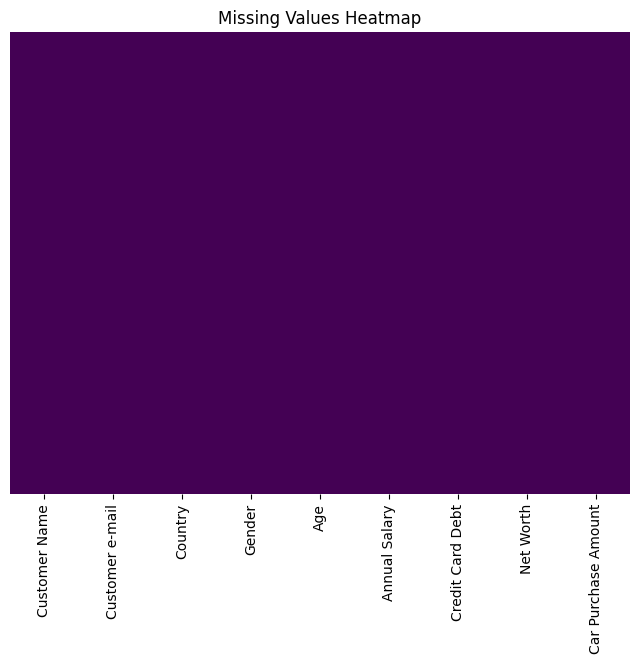

In [ ]:
# Visualize missing values using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(purchase_dataset.isnull(), cmap="viridis", yticklabels=False, cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
# Summary statistics
summary = purchase_dataset.describe()
print("\nSummary Statistics:")
print(summary)



Summary Statistics:
           Gender         Age  Annual Salary  Credit Card Debt  \
count  500.000000  500.000000     500.000000        500.000000   
mean     0.506000   46.241674   62127.239608       9607.645049   
std      0.500465    7.978862   11703.378228       3489.187973   
min      0.000000   20.000000   20000.000000        100.000000   
25%      0.000000   40.949969   54391.977195       7397.515792   
50%      1.000000   46.049901   62915.497035       9655.035568   
75%      1.000000   51.612263   70117.862005      11798.867487   
max      1.000000   70.000000  100000.000000      20000.000000   

            Net Worth  Car Purchase Amount  
count      500.000000           500.000000  
mean    431475.713625         44209.799218  
std     173536.756340         10773.178744  
min      20000.000000          9000.000000  
25%     299824.195900         37629.896040  
50%     426750.120650         43997.783390  
75%     557324.478725         51254.709517  
max    1000000.000000   

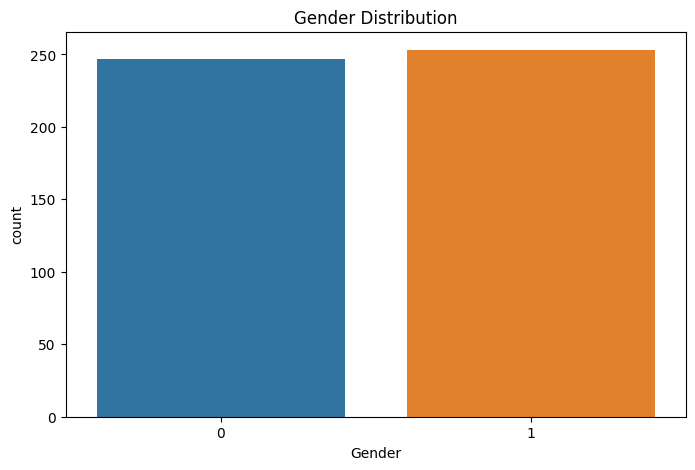

In [ ]:
# Gender distribution
plt.figure(figsize=(8, 5))
sns.countplot(x="Gender", data=purchase_dataset)
plt.title("Gender Distribution")
plt.show()

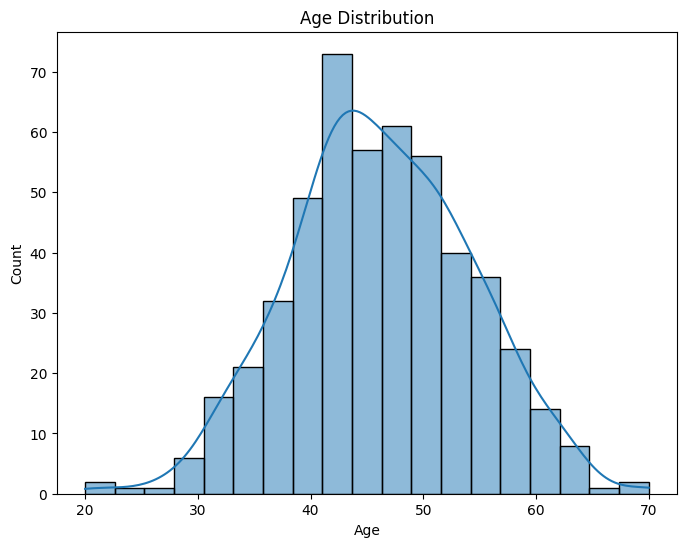

In [ ]:
# Age distribution
plt.figure(figsize=(8, 6))
sns.histplot(purchase_dataset["Age"], kde=True)
plt.title("Age Distribution")
plt.show()

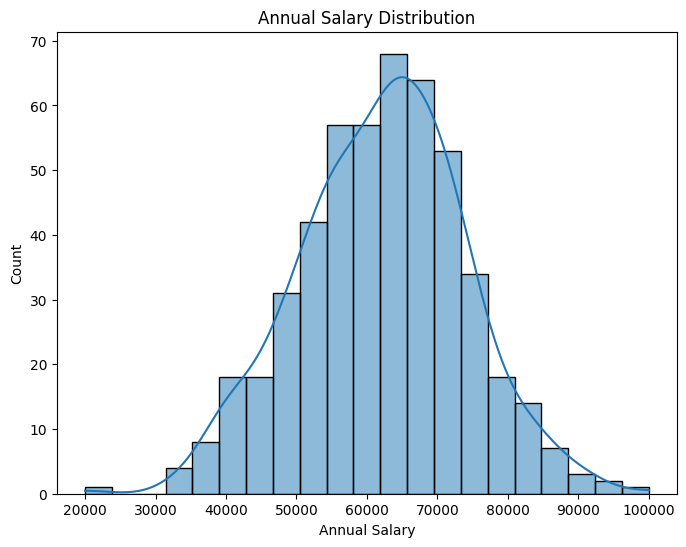

In [ ]:
# Annual Salary distribution
plt.figure(figsize=(8, 6))
sns.histplot(purchase_dataset["Annual Salary"], kde=True)
plt.title("Annual Salary Distribution")
plt.show()

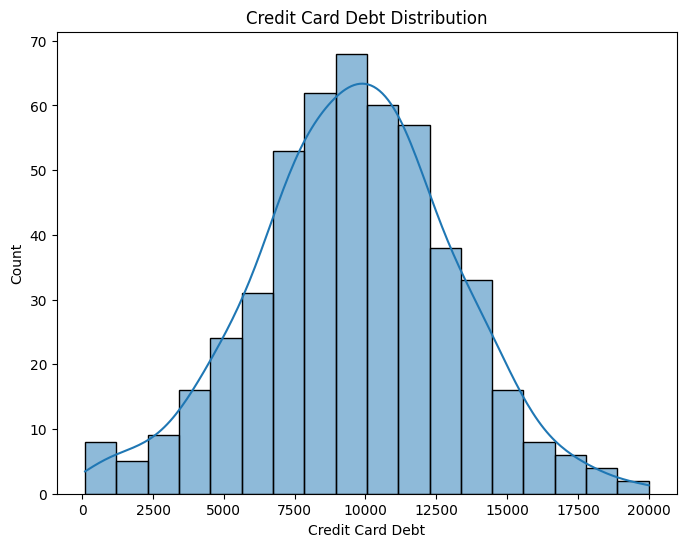

In [ ]:
# Credit Card Debt distribution
plt.figure(figsize=(8, 6))
sns.histplot(purchase_dataset["Credit Card Debt"], kde=True)
plt.title("Credit Card Debt Distribution")
plt.show()

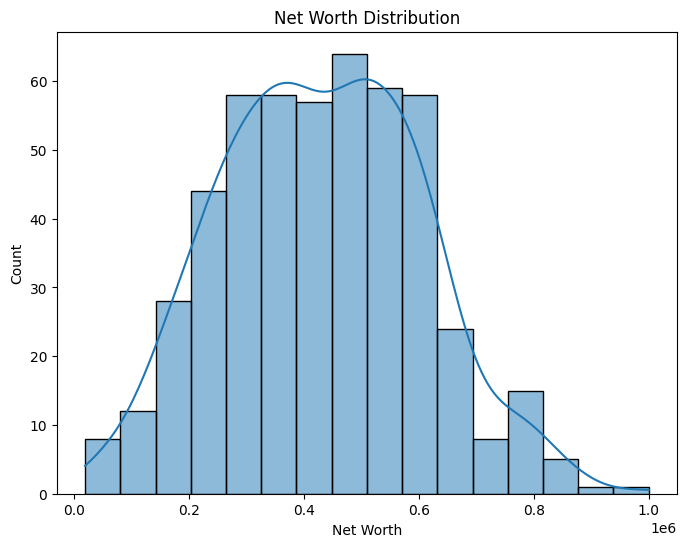

In [ ]:
# Net Worth distribution
plt.figure(figsize=(8, 6))
sns.histplot(purchase_dataset["Net Worth"], kde=True)
plt.title("Net Worth Distribution")
plt.show()

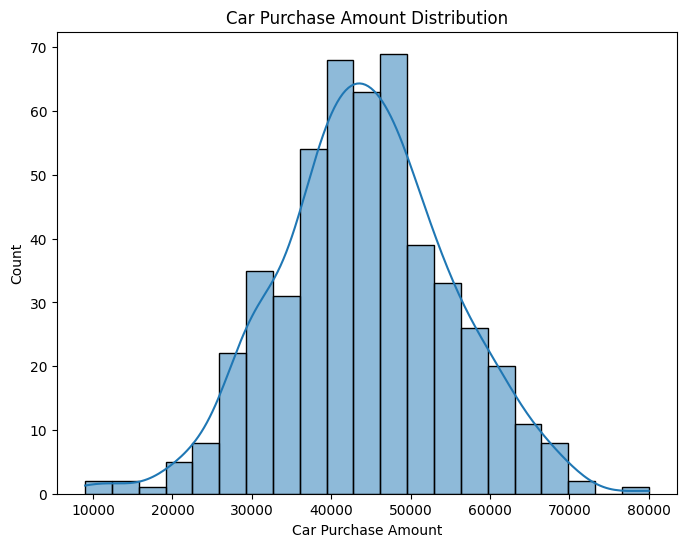

In [ ]:
# Car Purchase Amount distribution
plt.figure(figsize=(8, 6))
sns.histplot(purchase_dataset["Car Purchase Amount"], kde=True)
plt.title("Car Purchase Amount Distribution")
plt.show()

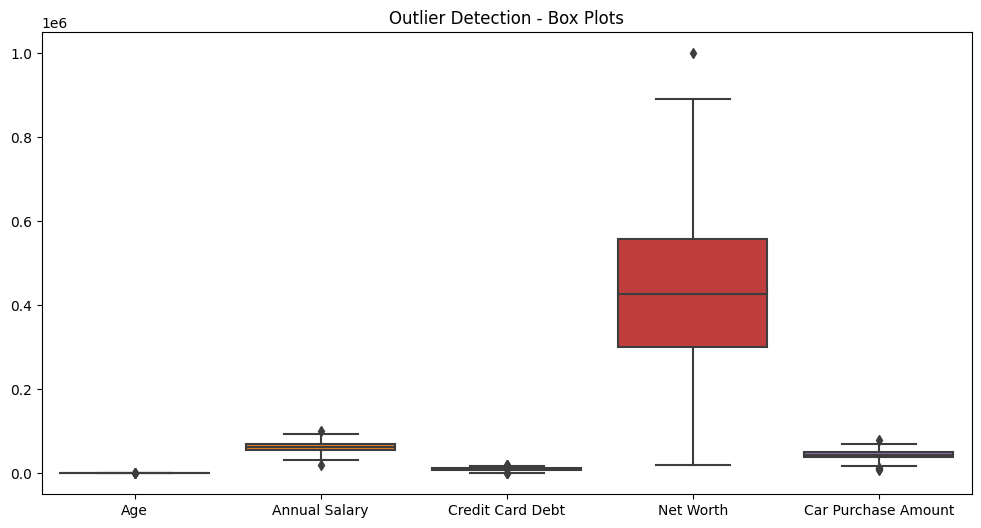

In [ ]:
# Visualize outliers using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=purchase_dataset[['Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth', 'Car Purchase Amount']])
plt.title("Outlier Detection - Box Plots")
plt.show()

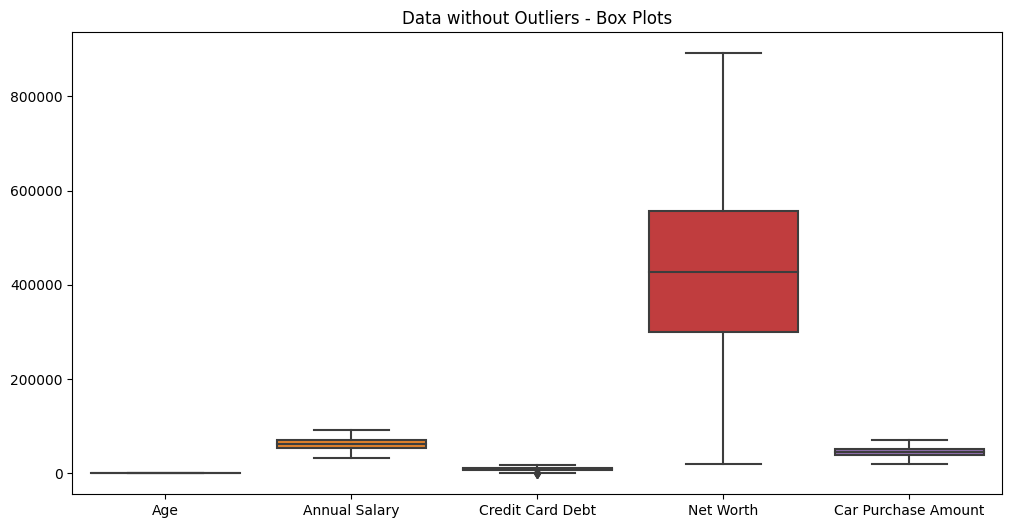

In [ ]:
# Detect and handle outliers using the IQR method
def remove_outliers_iqr(purchase_dataset, column):
    Q1 = purchase_dataset[column].quantile(0.25)
    Q3 = purchase_dataset[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return purchase_dataset[(purchase_dataset[column] >= lower_bound) & (purchase_dataset[column] <= upper_bound)]

numeric_columns = ['Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth', 'Car Purchase Amount']
for col in numeric_columns:
    purchase_dataset = remove_outliers_iqr(purchase_dataset, col)

# Visualize data without outliers using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=purchase_dataset[['Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth', 'Car Purchase Amount']])
plt.title("Data without Outliers - Box Plots")
plt.show()

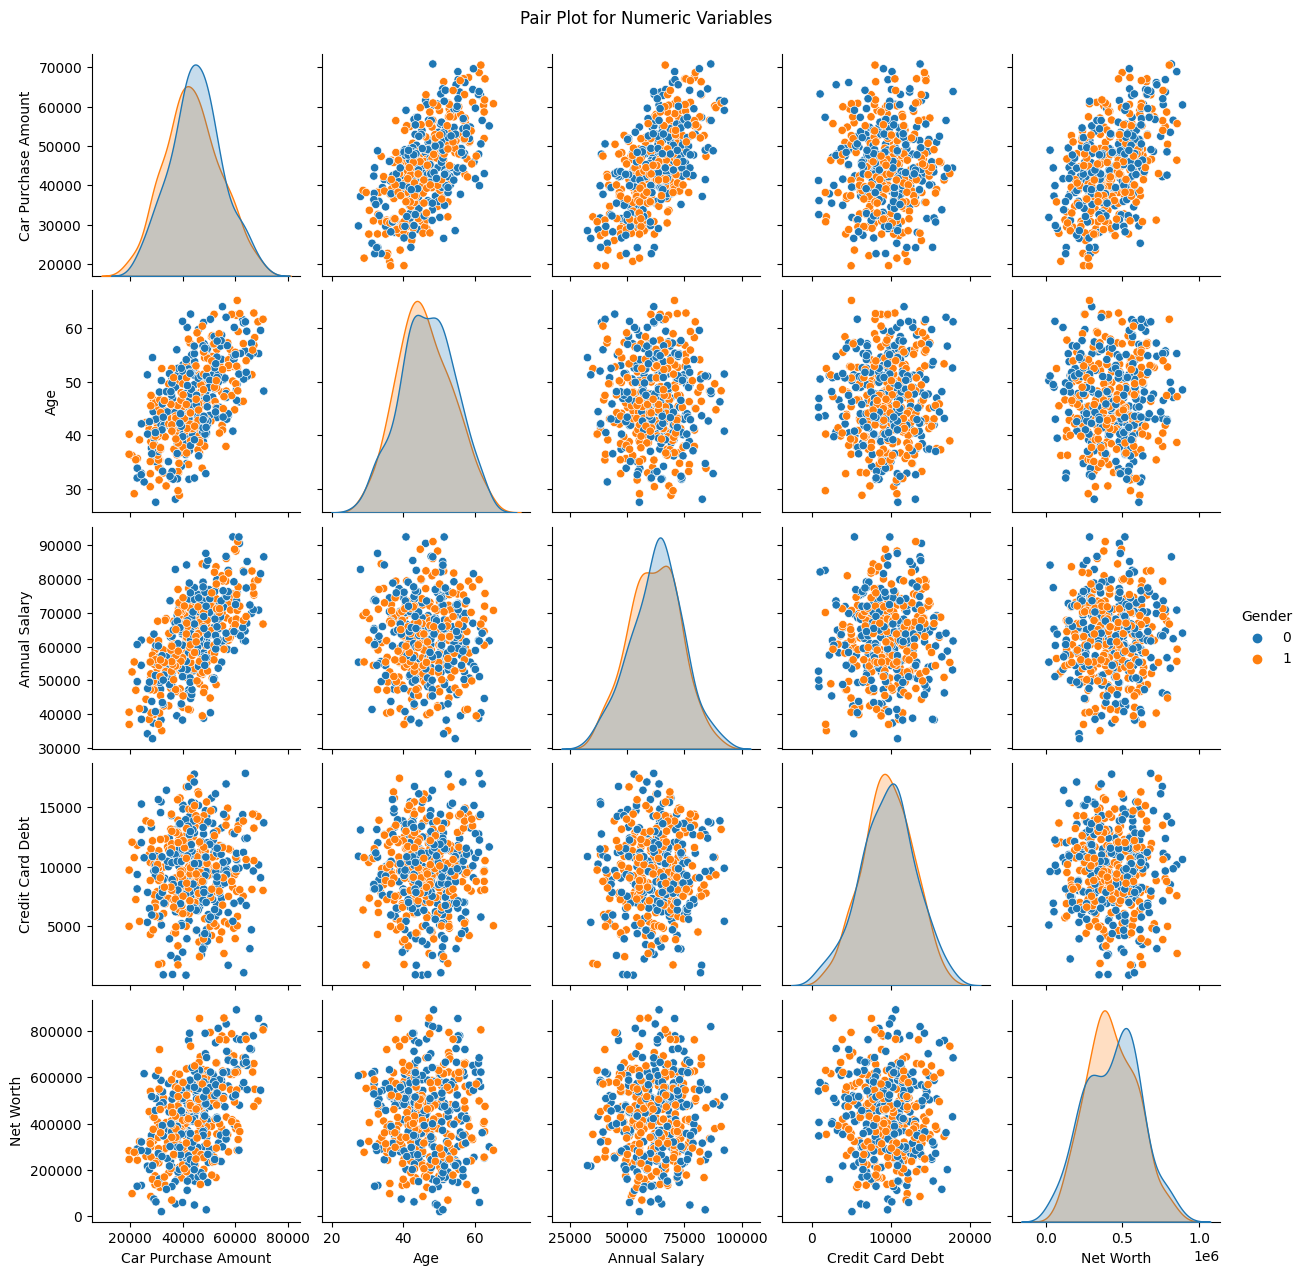

In [ ]:
# Pair plot to visualize pairwise relationships between all numeric variables
sns.pairplot(purchase_dataset, vars=["Car Purchase Amount", "Age", "Annual Salary", "Credit Card Debt", "Net Worth"], hue="Gender", diag_kind='kde')
plt.suptitle("Pair Plot for Numeric Variables", y=1.02)
plt.show()

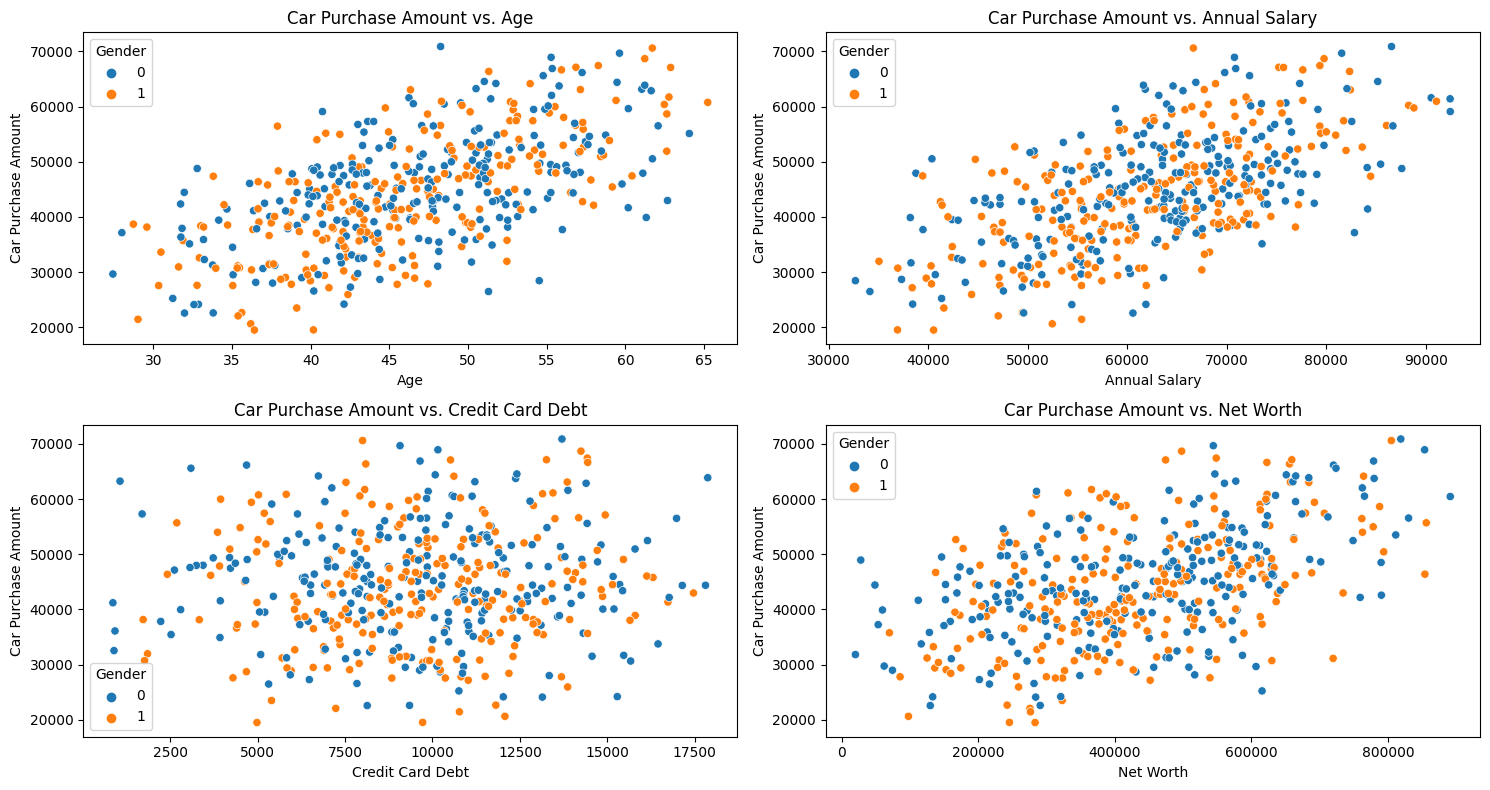

In [ ]:
# Scatter plots for individual relationships between "Car Purchase Amount" and other numeric variables
plt.figure(figsize=(15, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(data=purchase_dataset, x="Age", y="Car Purchase Amount", hue="Gender")
plt.title("Car Purchase Amount vs. Age")

plt.subplot(2, 2, 2)
sns.scatterplot(data=purchase_dataset, x="Annual Salary", y="Car Purchase Amount", hue="Gender")
plt.title("Car Purchase Amount vs. Annual Salary")

plt.subplot(2, 2, 3)
sns.scatterplot(data=purchase_dataset, x="Credit Card Debt", y="Car Purchase Amount", hue="Gender")
plt.title("Car Purchase Amount vs. Credit Card Debt")

plt.subplot(2, 2, 4)
sns.scatterplot(data=purchase_dataset, x="Net Worth", y="Car Purchase Amount", hue="Gender")
plt.title("Car Purchase Amount vs. Net Worth")

plt.tight_layout()
plt.show()

<ipython-input-318-f2b396e2dcf5>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



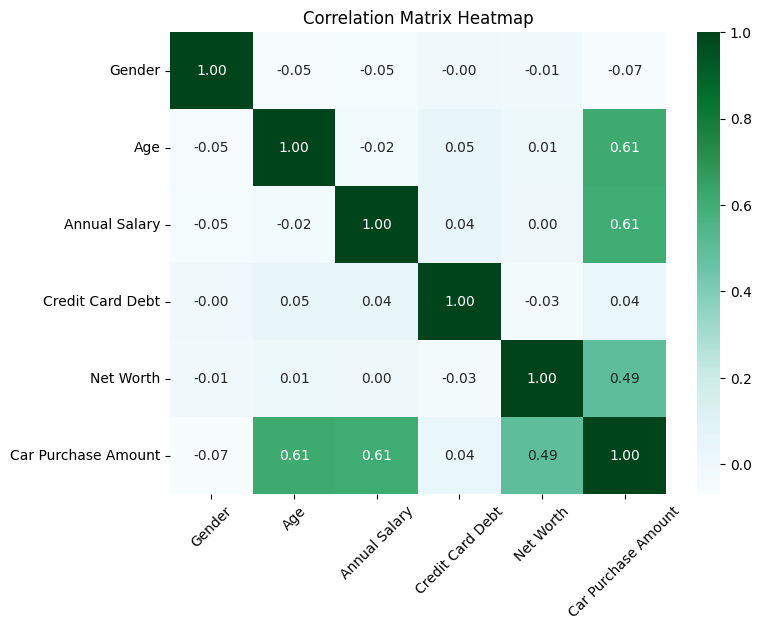

In [ ]:
# Calculate the correlation matrix
correlation_matrix = purchase_dataset.corr()

# Visualize the correlation matrix as a heatmap with the "BuGn" colormap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="BuGn", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.xticks(rotation=45)
plt.show()

Selected Features:
['Annual Salary', 'Age', 'Net Worth']


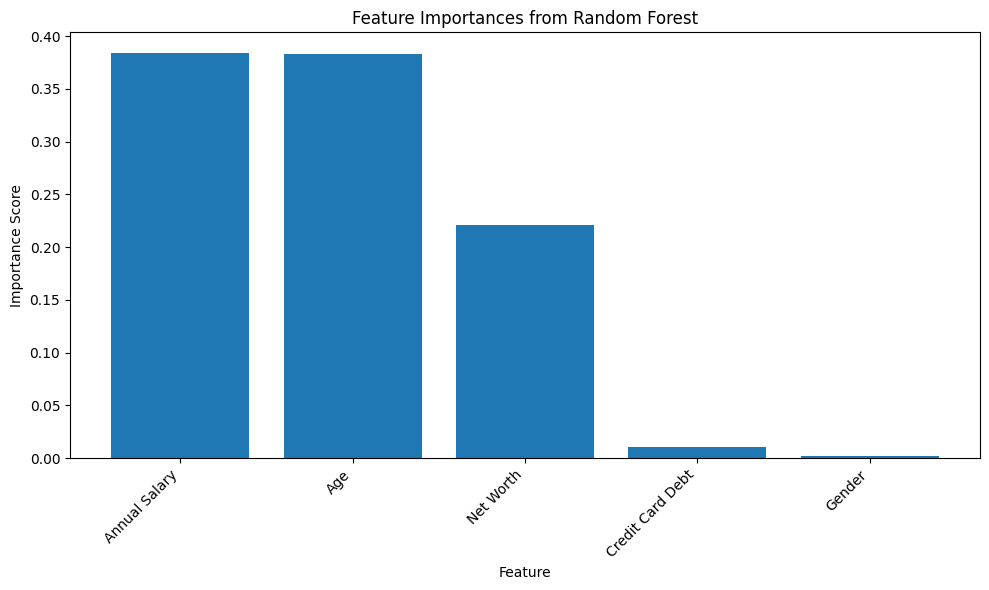

In [ ]:
# Drop non-numeric columns and "Car Purchase Amount" (our target variable) from the features
X = purchase_dataset.drop(["Customer Name", "Customer e-mail", "Country", "Car Purchase Amount"], axis=1)

# Get the target variable "Car Purchase Amount"
y = purchase_dataset["Car Purchase Amount"]

# Initialize the Random Forest regressor model
rf_model = RandomForestRegressor()

# Fit the Random Forest model to the data
rf_model.fit(X, y)

# Get feature importances from the Random Forest model
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances along with their names
feature_importances_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})

# Sort the DataFrame in descending order of importance
feature_importances_df = feature_importances_df.sort_values(by="Importance", ascending=False)

# Select the top features based on their importance
num_top_features = 3
selected_features = feature_importances_df.head(num_top_features)["Feature"].tolist()

# Print the selected feature names
print("Selected Features:")
print(selected_features)

# Plot the feature importances using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(feature_importances_df["Feature"], feature_importances_df["Importance"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importances from Random Forest")
plt.tight_layout()
plt.show()

Selected Features:
['Age', 'Annual Salary', 'Net Worth']


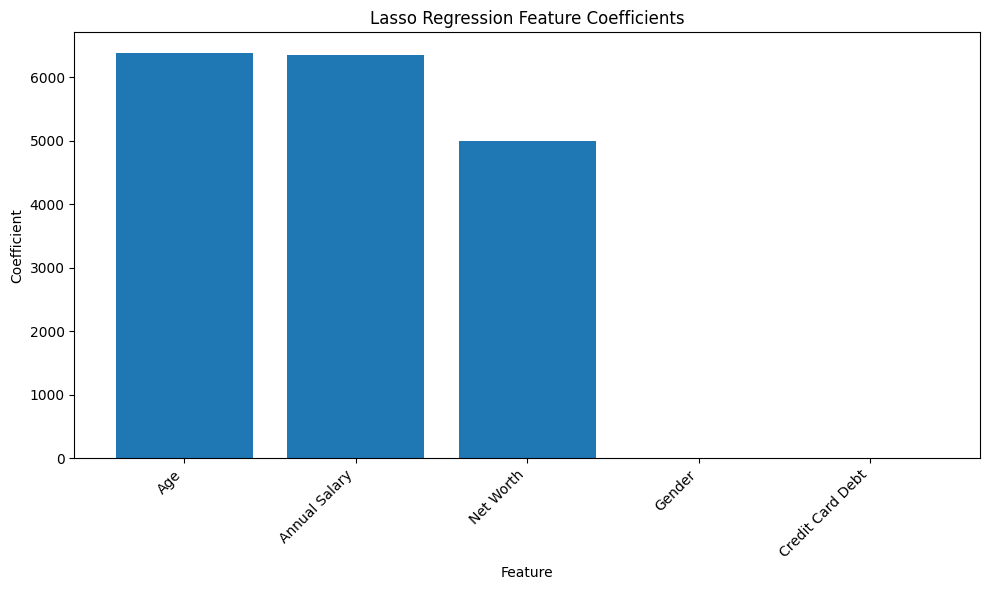

In [ ]:
# Standardize the features (important for Lasso regularization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize the Lasso Regression model
alpha = 0.1  # Regularization strength (adjust as needed)
lasso_model = Lasso(alpha=alpha)

# Fit the Lasso Regression model to the data
lasso_model.fit(X_scaled, y)

# Get the coefficients (including zeros) from the Lasso model
coefficients = lasso_model.coef_

# Create a DataFrame to store the features along with their coefficients
lasso_coefficients_df = pd.DataFrame({"Feature": X.columns, "Coefficient": coefficients})

# Sort the DataFrame based on the absolute values of coefficients (importance)
lasso_coefficients_df["Absolute Coefficient"] = abs(lasso_coefficients_df["Coefficient"])
lasso_coefficients_df = lasso_coefficients_df.sort_values(by="Absolute Coefficient", ascending=False)

# Filter out features with coefficient values exactly equal to zero
selected_features = lasso_coefficients_df[lasso_coefficients_df["Coefficient"] != 0]["Feature"].tolist()

# Print the selected feature names
print("Selected Features:")
print(selected_features)

# Plot the feature coefficients using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(lasso_coefficients_df["Feature"], lasso_coefficients_df["Coefficient"])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.title("Lasso Regression Feature Coefficients")
plt.tight_layout()
plt.show()

In [ ]:
X = purchase_dataset.drop(["Customer Name", "Customer e-mail", "Country", "Gender","Credit Card Debt","Car Purchase Amount"], axis=1)
X.shape

(483, 3)

In [ ]:
y = purchase_dataset['Car Purchase Amount']
y.shape

(483,)

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
scaler.data_max_

array([6.52248812e+01, 9.24711761e+04, 8.91439876e+05])

In [ ]:
scaler.data_min_

array([2.74402462e+01, 3.26979816e+04, 2.00000000e+04])

In [ ]:
print(X_scaled[:,0])

[0.38141095 0.35544546 0.41584764 0.81596986 0.79062569 0.77768773
 0.5072715  0.6021699  0.50667417 0.42037022 0.60050009 0.68122697
 0.44876039 0.55727067 0.73587107 0.68412787 0.45790976 0.5474934
 0.64611521 0.82842129 0.64735904 0.5462769  0.47880827 0.518254
 0.33089506 0.66527557 0.01507039 0.74607233 0.33889652 0.34260532
 0.63190944 0.6362444  0.4996256  0.61038475 0.59319416 0.6107185
 0.54538173 0.39723925 0.49831998 0.26847817 0.29993028 0.89411702
 0.73667237 0.39131367 0.62797729 0.37062845 0.33460879 0.3632059
 0.75009794 0.49738244 0.2443569  0.66231691 0.78554871 0.16874721
 0.41261837 0.60145431 0.39173518 0.38687268 0.38794313 0.71771086
 0.68058112 0.67798575 0.41972363 0.73654437 0.40373667 0.7915114
 0.65190601 0.46964042 0.76156634 0.35661601 0.53856503 0.75695502
 0.51662625 0.68583279 0.76960603 0.30984624 0.4707047  0.14784165
 0.44628542 0.32491803 0.32988095 0.24561737 0.33713687 0.45115347
 0.42311566 0.8200552  0.59589746 0.82495138 0.39515685 0.58467986
 

In [ ]:
y = y.values.reshape(-1,1)
y.shape

(483, 1)

In [ ]:
y_scaled = scaler.fit_transform(y)

In [ ]:
y_scaled

array([[3.07599576e-01],
       [4.98320024e-01],
       [4.55677598e-01],
       [9.32702401e-01],
       [7.08627838e-01],
       [7.22191513e-01],
       [1.83054690e-01],
       [5.43486948e-01],
       [5.54754673e-01],
       [3.63449230e-01],
       [7.69579500e-01],
       [4.43275231e-01],
       [1.78660164e-01],
       [5.79003727e-01],
       [5.83894539e-01],
       [6.52191109e-01],
       [4.34043252e-01],
       [4.74683367e-01],
       [4.88943098e-01],
       [6.87442348e-01],
       [6.15458815e-01],
       [4.64958576e-01],
       [5.39706787e-01],
       [5.27918465e-01],
       [4.97597112e-01],
       [4.84144775e-01],
       [3.43431858e-01],
       [5.75753598e-01],
       [4.76487493e-01],
       [4.89261840e-01],
       [9.12090752e-01],
       [6.61386189e-01],
       [3.95011987e-01],
       [6.24829043e-01],
       [3.78816757e-01],
       [3.19420994e-01],
       [6.87357994e-01],
       [5.11759282e-01],
       [4.29228531e-01],
       [1.65636123e-01],


# TRAINING THE MODEL

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [ ]:
model = Sequential()
model.add(Dense(25, input_dim=3, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 25)                100       
                                                                 
 dense_22 (Dense)            (None, 25)                650       
                                                                 
 dense_23 (Dense)            (None, 1)                 26        
                                                                 
Total params: 776
Trainable params: 776
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs=50, batch_size=25,  verbose=1, validation_split=0.2)

Epoch 1/50
12/12 [==============================] - 1s 26ms/step - loss: 0.1587 - val_loss: 0.0873
Epoch 2/50
12/12 [==============================] - 0s 8ms/step - loss: 0.0459 - val_loss: 0.0195
Epoch 3/50
12/12 [==============================] - 0s 8ms/step - loss: 0.0190 - val_loss: 0.0158
Epoch 4/50
12/12 [==============================] - 0s 9ms/step - loss: 0.0169 - val_loss: 0.0135
Epoch 5/50
12/12 [==============================] - 0s 8ms/step - loss: 0.0140 - val_loss: 0.0125
Epoch 6/50
12/12 [==============================] - 0s 8ms/step - loss: 0.0116 - val_loss: 0.0095
Epoch 7/50
12/12 [==============================] - 0s 7ms/step - loss: 0.0089 - val_loss: 0.0079
Epoch 8/50
12/12 [==============================] - 0s 6ms/step - loss: 0.0075 - val_loss: 0.0071
Epoch 9/50
12/12 [==============================] - 0s 7ms/step - loss: 0.0066 - val_loss: 0.0062
Epoch 10/50
12/12 [==============================] - 0s 7ms/step - loss: 0.0057 - val_loss: 0.0054
Epoch 11/50
12/12 

#EVALUATING THE MODEL

In [ ]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'val_loss'])


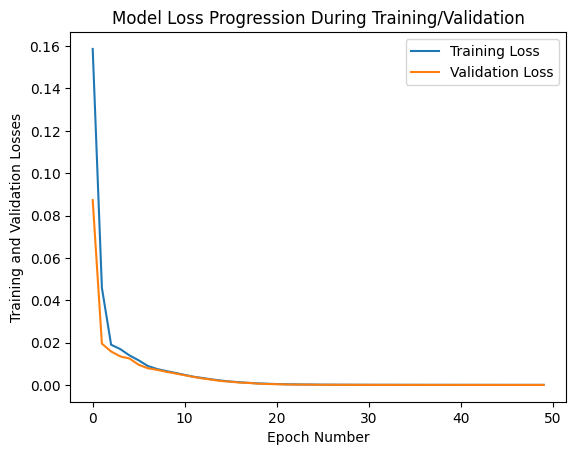

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

In [ ]:
# Gender, Age, Annual Salary, Credit Card Debt, Net Worth

X_Testing = np.array([[50, 50000, 629312]])

In [ ]:
y_predict = model.predict(X_Testing)
y_predict.shape

1/1 [==============================] - 0s 61ms/step


(1, 1)

In [ ]:
print('Expected Purchase Amount=', y_predict[:,0])

Expected Purchase Amount= [215818.98]


In [ ]:
# Make predictions on the test data
y_pred_test = model.predict(X_test)

# Calculate Mean Squared Error (MSE) on the test data
mse = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error (MSE):", mse)

# Calculate R-squared (R2) on the test data
r2 = r2_score(y_test, y_pred_test)
print("R-squared (R2):", r2)

4/4 [==============================] - 0s 3ms/step
Mean Squared Error (MSE): 5.2961700098498004e-05
R-squared (R2): 0.9987351720184348
